In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [28]:
from IPython.display import IFrame, display
file = 'Lectures/Jacobi_GaussSeidel.pdf'
IFrame(file, width=600, height=400)

# Arrays with numpy 

In [4]:
x = [1.,3.,6.]
x+x

[1.0, 3.0, 6.0, 1.0, 3.0, 6.0]

In [5]:
y = np.array([1.,3.,6.])
y+y

array([ 2.,  6., 12.])

In [6]:
np.sin(y)*y**5

array([ 8.41470985e-01,  3.42921620e+01, -2.17273491e+03])

In [9]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a*a

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [10]:
np.dot(a,a)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [11]:
x = np.array([3,4,5])
a*x

array([[ 3,  8, 15],
       [12, 20, 30],
       [21, 32, 45]])

In [12]:
np.dot(x,a)

array([54, 66, 78])

In [14]:
# Transpuesta
print(a)
print(a.T)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [16]:
print(x)
print(x.T)

[3 4 5]
[3 4 5]


In [17]:
# Otras formas de definir M
np.matrix("1,2,3;4,5,6;7,8,9")

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [18]:
a = np.matrix("3,4,5")
a[0,1]

4

In [21]:
#np.rank(np.array(a)) # Actualizado
np.ndim(np.array(a))

2

In [22]:
# Obtener auto-valores y auto-vectores.

In [25]:
a=np.array([[1.,2,3],[4,5,6],[7,8,9]])
evals, evecs = np.linalg.eig(a)
print(evals); print(evecs)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


# Matriz para invertir

In [26]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
print(M)

[[ 3. -1. -1.]
 [-1.  3.  1.]
 [ 2.  1.  4.]]


In [27]:
b = np.array([1.,3.,7.])
print(b)

[1. 3. 7.]


In [29]:
# M.shape[0] para numero de fila
# M.shape[1] para numero de columnas
n = M.shape[1]
x = np.zeros(n)

print(M[0,:], M[:,0])

(array([ 3., -1., -1.]), array([ 3., -1.,  2.]))


# Método de Jacobi

$$ x_{i}^{k+1} = \frac{1}{a_{ii}}( b_{i} - \sum_{i \neq j} a_{ij}x_{j}^{k} ), i = 1,2,3,... $$

In [30]:
def GetJacobiMethod(Matrix, bvector, itmax, error):
    n = Matrix.shape[1]
    x = np.zeros(n)
    sumk = np.zeros(n)
    
    it = 0
    
    residuo = np.linalg.norm(bvector - np.dot(Matrix, x))
    
    while( residuo > error and it < itmax ):
        it += 1
        
        for i in range(len(Matrix[0,:])):
            sum_ = 0
            for j in range(len(Matrix[:,0])):
                if( i != j ):
                    sum_ += Matrix[i][j]*x[j]
            
            sumk[i] = sum_;
            
        for i in range(len(Matrix[0,:])):
            
            if(Matrix[i,i] != 0):
                x[i] = (bvector[i]- sumk[i])/Matrix[i,i]
            else:
                print('No invertible con Jacobi')
                return
            
        print(x)
        residuo = np.linalg.norm(bvector - np.dot(Matrix, x))
            
    return x, it, error

In [52]:
Xsol, it , error = GetJacobiMethod(M, b, 30, 1e-10)
print(Xsol)
print(it, error)

[0.33333333 1.         1.75      ]
[1.25       0.52777778 1.33333333]
[0.9537037  0.97222222 0.99305556]
[0.98842593 0.98688272 1.03009259]
[1.00565844 0.98611111 1.00906636]
[0.99839249 0.99886403 1.000643  ]
[0.99983568 0.99924983 1.00108775]
[1.00011253 0.99958264 1.0002697 ]
[0.99995078 0.99994761 1.00004808]
[0.99999856 0.99996757 1.00003771]
[1.00000176 0.99998695 1.00000883]
[0.99999859 0.99999764 1.00000238]
[1.00000001 0.99999874 1.00000129]
[1.00000001 0.99999957 1.00000031]
[0.99999996 0.9999999  1.0000001 ]
[1.         0.99999995 1.00000004]
[1.         0.99999999 1.00000001]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
(23, 1e-10)


In [33]:
M1 = np.array([[3,-0.1,-0.2],[0.1,7.,-0.3],[0.3,-0.2,10]])
b1 = np.array([7.85,-19.3,71.4])

In [45]:
Xsol, it, error = GetJacobiMethod(M1,b1, 30, 1e-10)
print(Xsol)
print(it, error)

[ 2.61666667 -2.75714286  7.14      ]
[ 3.0007619  -2.48852381  7.00635714]
[ 3.00080635 -2.49973844  7.00020667]
[ 3.0000225  -2.50000266  6.99998104]
[ 2.99999865 -2.50000113  6.99999927]
[ 2.99999991 -2.50000001  7.00000002]
[ 3.  -2.5  7. ]
[ 3.  -2.5  7. ]
[ 3.  -2.5  7. ]
[ 3.  -2.5  7. ]
(9, 1e-10)


# Get T matrix

$$ T = D^{-1}R $$

In [36]:
def GetTMatrix(Matrix):
    
    D = np.zeros((Matrix.shape[0],Matrix.shape[1]))
    R = np.zeros((Matrix.shape[0],Matrix.shape[1])) 
    T = np.zeros((Matrix.shape[0],Matrix.shape[1]))
    
    for i in range(len(Matrix[0,:])):
        for j in range(len(Matrix[:,0])):
            if( i == j):
                D[i,j] = 1./Matrix[i,j]
            else:
                R[i,j] = Matrix[i,j]
                
    T = np.dot(D,R)
    return T

In [37]:
T = GetTMatrix(M)
print(T)

[[ 0.         -0.33333333 -0.33333333]
 [-0.33333333  0.          0.33333333]
 [ 0.5         0.25        0.        ]]


# Teorema

Si A es una matriz estrictamente diagonal dominante, entonces la iteración del método de Jacobi converge para cualquier valor inicial.

# Teorema

La sucesión $x^{k+1} = Tx^{k} + c$, para $k \ge 0$ converge a la sucesión única $x = Tx + c$ si y sólo si $\rho(T) < 1$

Definición de radio espectral: 

Si $\lambda_{1},...,\lambda_{n}$ son los valores propios de una matriz $A$, entonces su radio espectral $\rho(A)$ se define como:

$$ \rho(A) := \underbrace{max}_{i}(|\lambda_{i}|) $$

In [39]:
# Calculando eigen-valores y eigen-vectores
valores, vectores = np.linalg.eig(T)
print(valores)
print(vectores)

[-0.33333333+0.j          0.16666667+0.23570226j  0.16666667-0.23570226j]
[[-0.07412493+0.00000000e+00j  0.60302269+1.38777878e-17j
   0.60302269-1.38777878e-17j]
 [-0.74124932+0.00000000e+00j -0.60302269+0.00000000e+00j
  -0.60302269-0.00000000e+00j]
 [ 0.66712438+0.00000000e+00j  0.30151134-4.26401433e-01j
   0.30151134+4.26401433e-01j]]


In [40]:
print(abs(valores), np.amax(abs(valores)))

(array([0.33333333, 0.28867513, 0.28867513]), 0.33333333333333315)


# Método de Gauss-Seidel

In [42]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])
n = M.shape[1]
x = np.zeros(n)

In [50]:
def GetGaussSeidelMethod(Matrix, bvector, itmax, error):
    
    n = Matrix.shape[1]
    x = np.zeros(n)
    
    r = np.linalg.norm(bvector - np.dot(Matrix, x)) 
    it = 0
    
    while r > error and it < itmax:
        it += 1
        
        for i in range(len(Matrix[0,:])):
            sum_ = 0
            for j in range(len(Matrix[:,0])):
                if( i!=j ):
                    sum_ += Matrix[i,j]*x[j]
            
            x[i] = (bvector[i] - sum_)/Matrix[i,i]
            
        print(x)
        r = np.linalg.norm(bvector - np.dot(Matrix, x)) 
        
    return x, r, it

In [51]:
Xsol, error, it = GetGaussSeidelMethod(M, b, 30, 1e-10)
print(Xsol)
print(it, error)

[0.33333333 1.11111111 1.30555556]
[1.13888889 0.94444444 0.94444444]
[0.96296296 1.00617284 1.01697531]
[1.00771605 0.99691358 0.99691358]
[0.99794239 1.00034294 1.00094307]
[1.00042867 0.99982853 0.99982853]
[0.99988569 1.00001905 1.00005239]
[1.00002381 0.99999047 0.99999047]
[0.99999365 1.00000106 1.00000291]
[1.00000132 0.99999947 0.99999947]
[0.99999965 1.00000006 1.00000016]
[1.00000007 0.99999997 0.99999997]
[0.99999998 1.         1.00000001]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
(18, 5.8030712832710874e-11)


# Usando numpy

In [54]:
Sol = np.linalg.solve(M,b)
print(Sol)

[1. 1. 1.]


In [57]:
x, y = np.linspace(0.,2.,20), np.linspace(0.,2.,20)
X, Y = np.meshgrid(x,y)

In [62]:
Z1 = (b[0] - M[0,0]*X - M[0,1]*Y)/M[0,2]
Z2 = (b[1] - M[1,0]*X - M[1,1]*Y)/M[1,2]
Z3 = (b[2] - M[2,0]*X - M[2,1]*Y)/M[2,2]

<IPython.core.display.Javascript object>


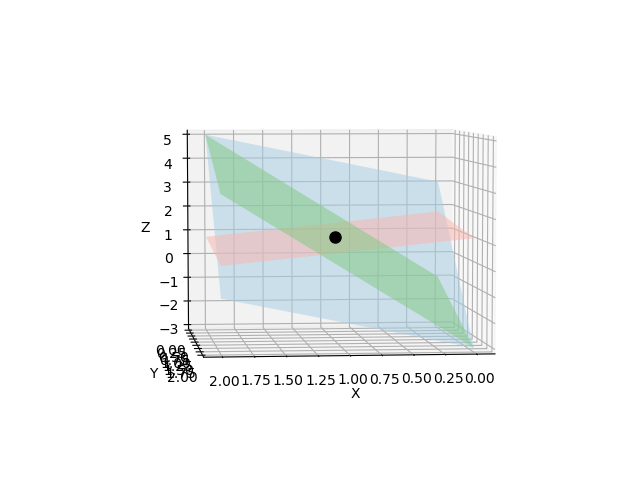

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z1, alpha = 0.5, cmap=cm.Accent, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z2, alpha = 0.5, cmap=cm.Paired, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z3, alpha = 0.5, cmap=cm.Pastel1, rstride=100, cstride=100)
ax.plot( (Sol[0],), (Sol[1],), (Sol[2],), lw=2, c='k',marker='o', markersize=8 )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(40, 60)
plt.show()